In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pymysql
conn= pymysql.connect(
    host='localhost',
    user='root',
    password='Mysql@123',
    db='demo10'
)
conn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
query= 'select * from laptop'
laptop=pd.read_sql(query,conn)
laptop

,MyUnknownColumn,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1268,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1269,1300,1300.0,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1270,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [5]:
laptop.head()

,MyUnknownColumn,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


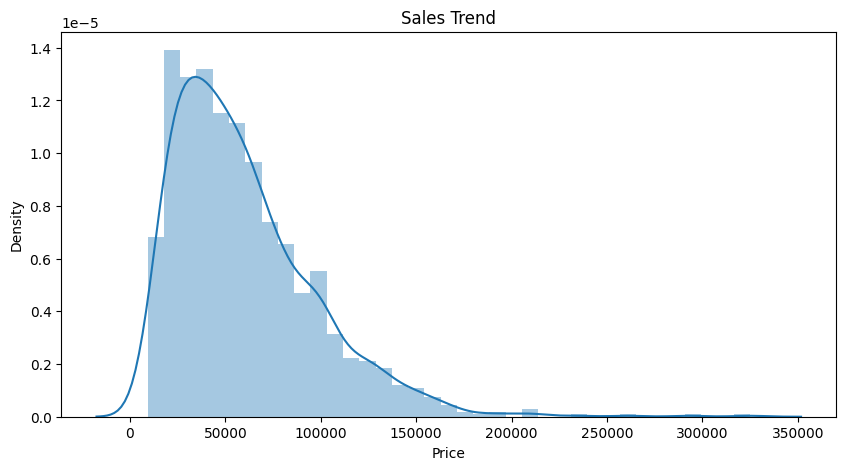

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(laptop["Price"])
plt.title("Sales Trend")
plt.show()

In [7]:
laptop.shape

(1272, 13)

In [8]:
#There are 2 unkonwn columns they are nothing but index (Unnamed: 0.1,Unnamed: 0)
laptop.columns

Index(['MyUnknownColumn', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [9]:
laptop.drop(columns=['MyUnknownColumn','Unnamed: 0'],inplace=True)

In [10]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
laptop.shape

(1272, 11)

In [12]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1272 non-null   object 
 1   TypeName          1272 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1272 non-null   object 
 4   Cpu               1272 non-null   object 
 5   Ram               1272 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1272 non-null   object 
 8   OpSys             1272 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1272 non-null   float64
dtypes: float64(2), object(9)
memory usage: 109.4+ KB


In [13]:
laptop.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [14]:
laptop['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [15]:
laptop.replace('?',np.nan,inplace=True)

In [16]:
laptop.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [17]:
laptop.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [18]:
laptop.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
811,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,87912.00
1228,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.4kg,65481.12
527,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,74538.72


In [19]:
laptop["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [20]:
# Changing dtypes
laptop["Ram"]=laptop["Ram"].str.replace('GB','').astype(int)
laptop['Weight'] = laptop['Weight'].str.replace('kg','').astype(float)

In [21]:
laptop.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [22]:
# FILLING NULL VALUES
mode=laptop["Memory"].mode()[0]
median=laptop["Weight"].median()

In [23]:
mode,median

('256GB SSD', 2.04)

In [24]:
laptop['Memory'].fillna(mode,inplace=True)        # Filling the null values with mode
laptop["Weight"].fillna(median,inplace=True)        # Filling the null values with median

In [25]:
laptop.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [26]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [27]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [28]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

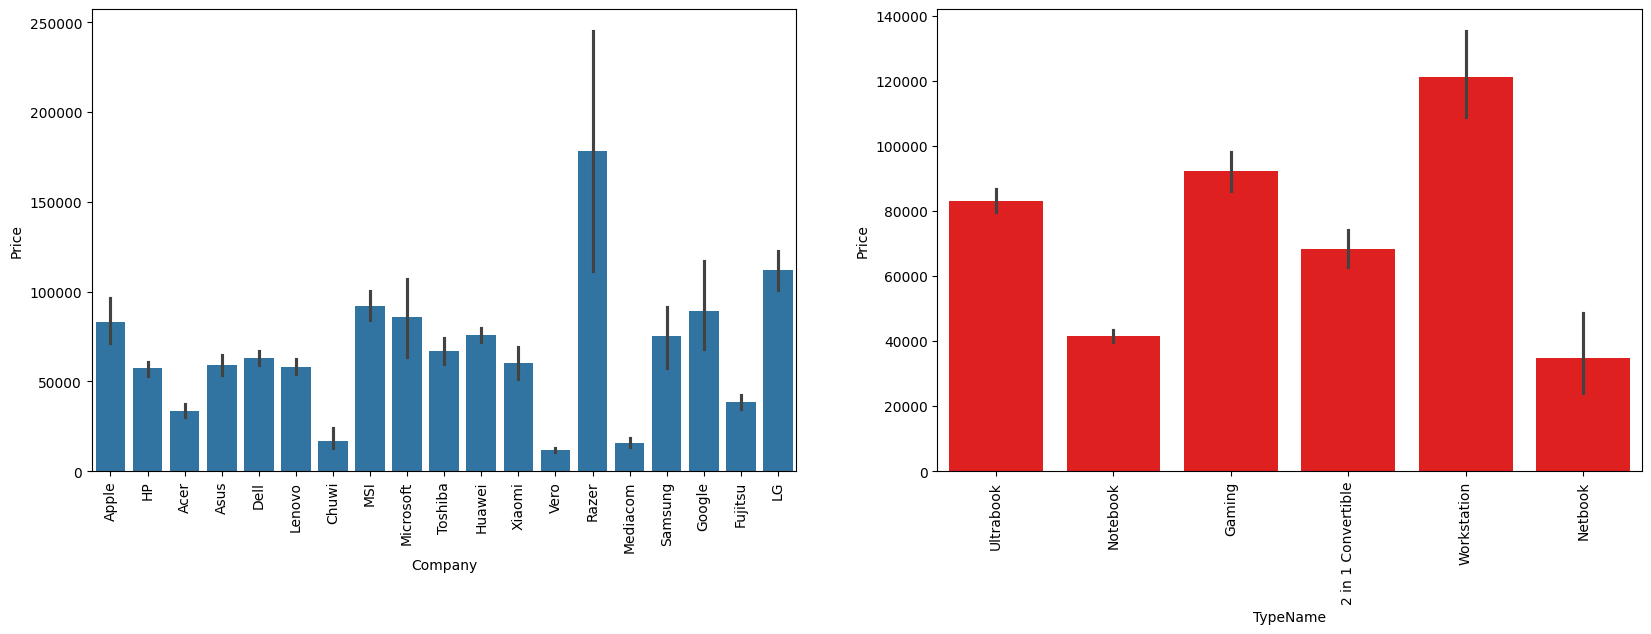

In [29]:
# checking the distribution of Company and Typename with Price
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=laptop["Company"],y=laptop["Price"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x=laptop["TypeName"],y=laptop["Price"],color='red')
plt.xticks(rotation="vertical")

plt.show()

In [30]:
laptop.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


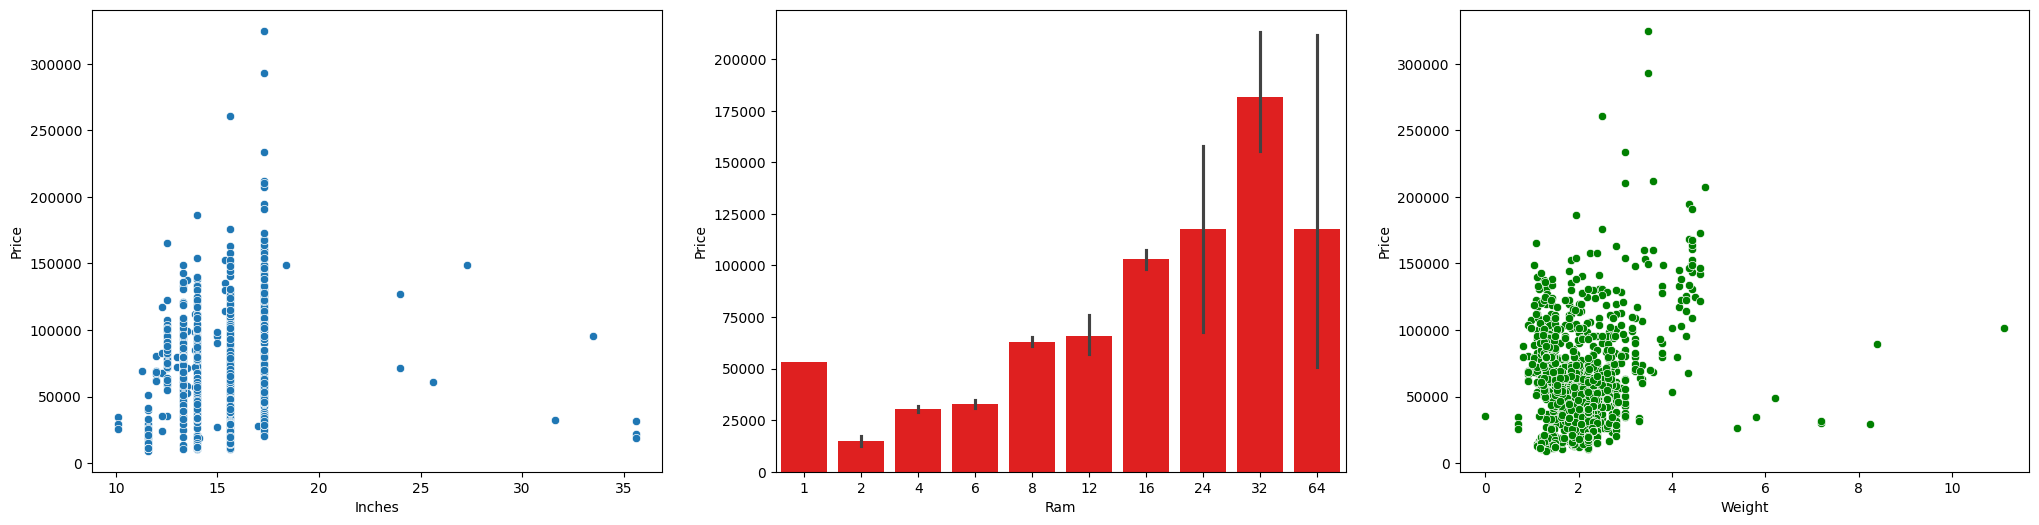

In [31]:
# checking the distribution of numerical columns
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.scatterplot(x=laptop["Inches"],y=laptop["Price"])
plt.subplot(1,3,2)
sns.barplot(x=laptop["Ram"],y=laptop["Price"],color='red')
plt.subplot(1,3,3)
sns.scatterplot(x=laptop["Weight"],y=laptop["Price"],color='green')

plt.show()

In [32]:
laptop.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [33]:
# handling highmagnified categorical columns one by one

In [34]:
laptop['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [35]:
#creating diff feature columns from single column
laptop["Touchscreen"]=laptop["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)
laptop["IPS"]=laptop["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [36]:
laptop.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0


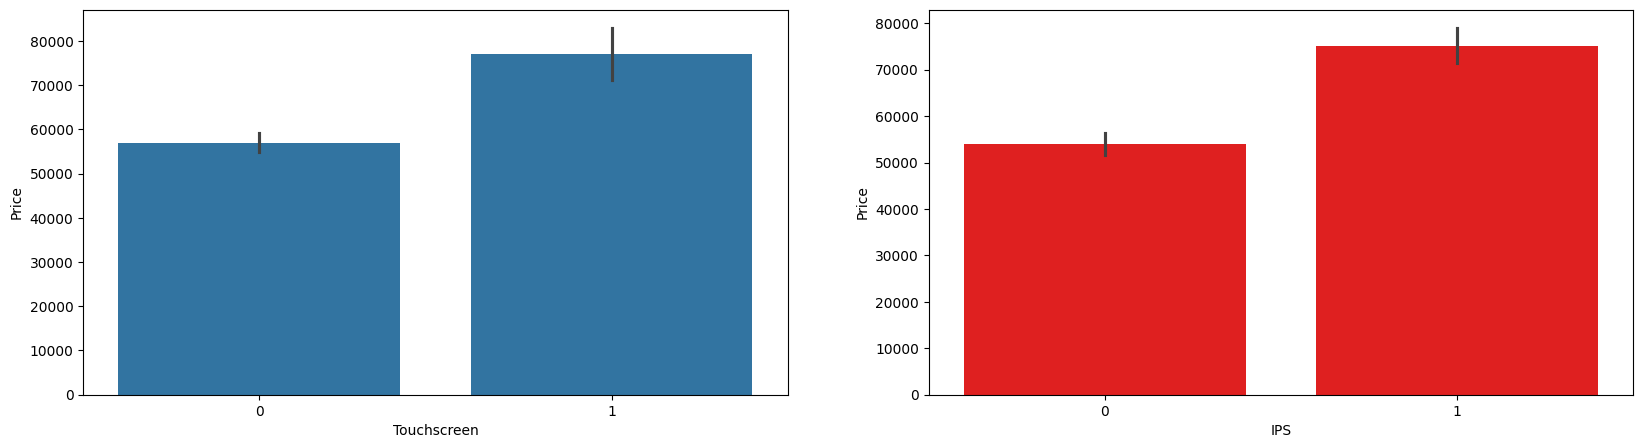

In [37]:
# checking distribution of created columns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=laptop["Touchscreen"],y=laptop["Price"])
plt.subplot(1,2,2)
sns.barplot(x=laptop["IPS"],y=laptop["Price"],color='red')
plt.show()

In [38]:
# separating resolutions from column
new_res=laptop["ScreenResolution"].str.split("x",n=1,expand=True)
laptop["X_ScrRes"]=new_res[0]
laptop["Y_ScrRes"]=new_res[1]

In [39]:
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_ScrRes,Y_ScrRes
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [40]:
laptop["X_ScrRes"]=laptop["X_ScrRes"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [41]:
laptop.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_ScrRes,Y_ScrRes
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [42]:
laptop.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
IPS                   int64
X_ScrRes             object
Y_ScrRes             object
dtype: object

In [43]:
#changing data types to int 

laptop["X_ScrRes"]=laptop["X_ScrRes"].astype("int")
laptop["Y_ScrRes"]=laptop["Y_ScrRes"].astype("int")

#creating new ppi(pixel per index) column using Resolutions and Inches columns

laptop["ppi"]=(((laptop["X_ScrRes"]**2) + (laptop["Y_ScrRes"]**2))**0.5/laptop["Inches"]).astype(float)

#dropping the columns

laptop.drop(columns=["Inches","ScreenResolution","X_ScrRes","Y_ScrRes"],inplace=True)

In [44]:
laptop.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [45]:
#handling the Cpu column
laptop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [46]:
#extracting first three strings from Cpu  creating new column
laptop["Cpu Name"]=laptop["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
laptop.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


<Axes: xlabel='Cpu Name'>

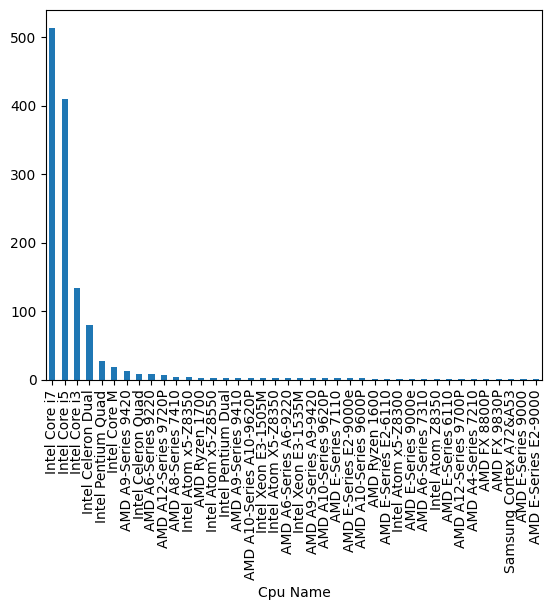

In [48]:
laptop["Cpu Name"].value_counts().plot(kind='bar')

In [49]:
def fetching_processor(text):
  if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
    return text
  else:
    if text.split()[0]=="Intel":
      return "other Intel Processor"
    else:
      return "AMD Processor"

In [50]:
laptop['Cpu brand']=laptop['Cpu Name'].apply(fetching_processor)

In [51]:
laptop.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

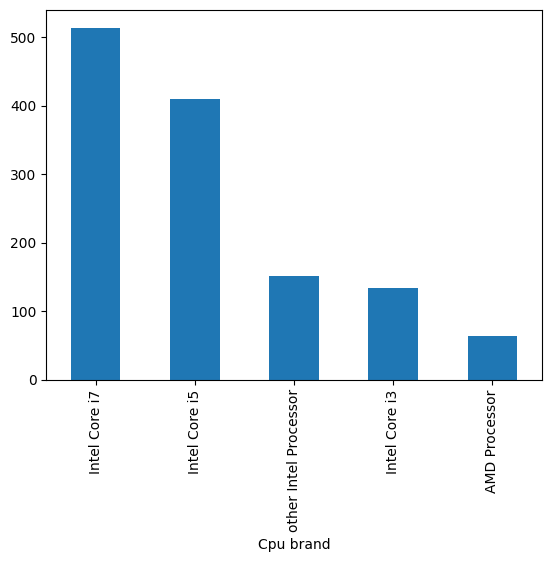

In [52]:
laptop["Cpu brand"].value_counts().plot(kind='bar')

In [53]:
laptop.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [54]:
laptop.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


<Axes: xlabel='Memory'>

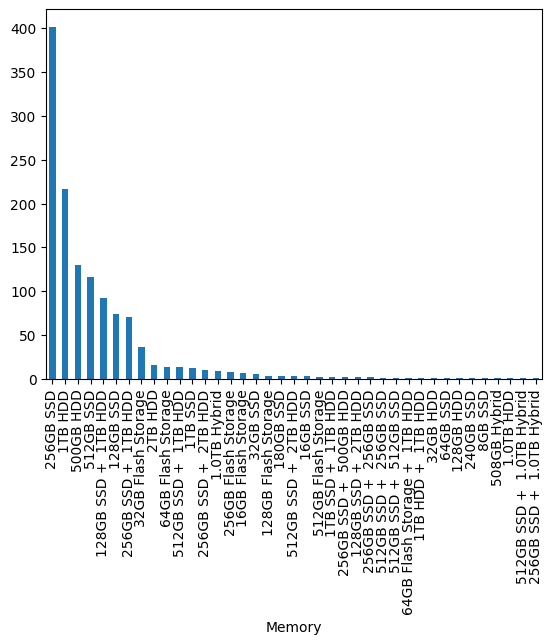

In [55]:
#Handling Memory Column
laptop["Memory"].value_counts().plot(kind='bar')

In [56]:
# Step-by-step transformation
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new2 = laptop["Memory"].str.split("+", n = 1, expand = True)
laptop["first"] = new2[0]
laptop["first"] = laptop["first"].str.strip()
laptop["second"] = new2[1]
laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-numeric characters
laptop['first'] = laptop['first'].str.replace(r'\D', '', regex=True)
laptop["second"].fillna("0", inplace=True)
laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-numeric characters
laptop['second'] = laptop['second'].str.replace(r'\D', '', regex=True)

# Convert to integers
laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

# Calculate storage types
laptop["SSD"] = (laptop["first"] * laptop["Layer1SSD"] + laptop["second"] * laptop["Layer2SSD"])
laptop["HDD"] = (laptop["first"] * laptop["Layer1HDD"] + laptop["second"] * laptop["Layer2HDD"])
laptop["Hybrid"] = (laptop["first"] * laptop["Layer1Hybrid"] + laptop["second"] * laptop["Layer2Hybrid"])
laptop["Flash_Storage"] = (laptop["first"] * laptop["Layer1Flash_Storage"] + laptop["second"] * laptop["Layer2Flash_Storage"])

In [57]:
laptop.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,256,0,0,0


In [58]:
# Dropping the those not important columns to concise the dataset
laptop.drop(columns=['Memory','first','second','Layer1SSD','Layer1HDD','Layer1Hybrid','Layer1Flash_Storage',
                     'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [59]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


<Axes: xlabel='Gpu'>

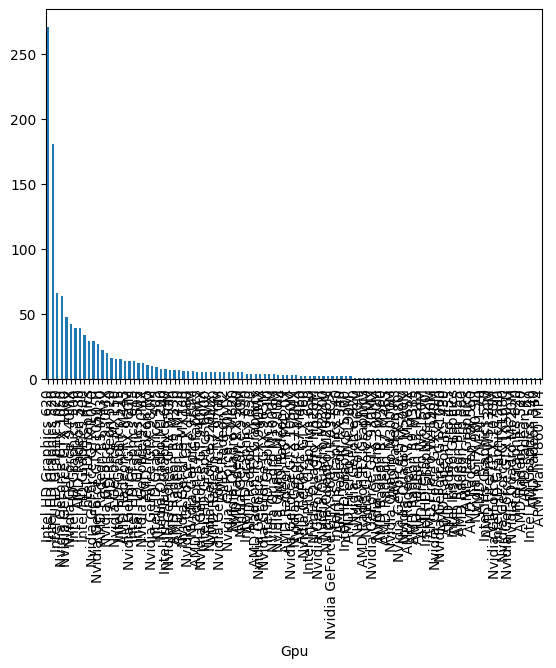

In [60]:
#handling Gpu Column
laptop['Gpu'].value_counts().plot(kind='bar')

In [61]:
#extracting gpu sets from original column
laptop['Gpu brand']=laptop['Gpu'].apply(lambda x:x.split()[0])

<Axes: xlabel='Gpu brand'>

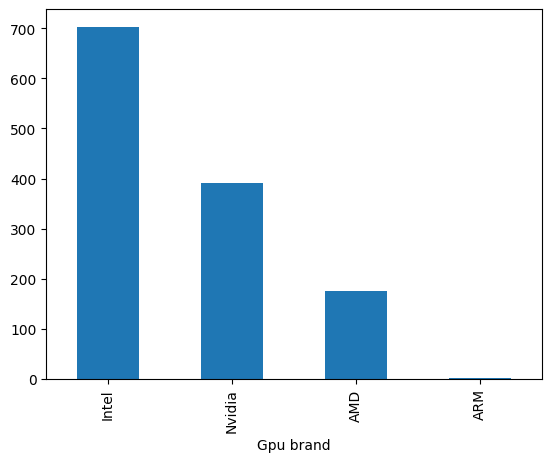

In [62]:
laptop['Gpu brand'].value_counts().plot(kind='bar')

In [63]:
laptop['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    392
AMD       176
ARM         1
Name: count, dtype: int64

In [64]:
# single Arm Gpu column 
laptop[laptop['Gpu brand']=='ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage,Gpu brand
1162,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,0,32,ARM


In [65]:
#dropping gpu column
laptop.drop(columns=['Gpu'],inplace=True)

In [66]:
laptop.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel


In [67]:
#handling Opsys column
laptop['OpSys'].value_counts()

OpSys
Windows 10      1046
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [68]:
# segregating OS Accordingly
def fetch_OS(text):
  if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
    return 'Windows'
  elif text=='macOS' or text=='Mac OS X':
    return 'Mac'
  else:
    return 'others/No OS/Linux'

In [69]:
laptop['OS']=laptop['OpSys'].apply(fetch_OS)

<Axes: xlabel='OS', ylabel='Price'>

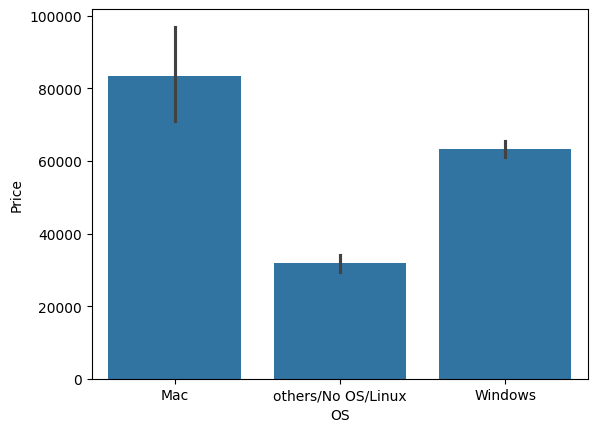

In [70]:
sns.barplot(x=laptop['OS'],y=laptop['Price'])

In [71]:
laptop.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel,others/No OS/Linux


In [72]:
#dropping OpSys column
laptop.drop(columns=['OpSys'],inplace=True)

In [73]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0,Intel,Mac


In [74]:
#correlation between price with other numerical columns

(laptop[['Ram','Weight','Price','Touchscreen','IPS','ppi','SSD','HDD','Hybrid','Flash_Storage']].corr())['Price']

Ram              0.686675
Weight           0.176669
Price            1.000000
Touchscreen      0.189851
IPS              0.256131
ppi              0.469417
SSD              0.669079
HDD             -0.094386
Hybrid           0.007992
Flash_Storage   -0.038167
Name: Price, dtype: float64

<Axes: >

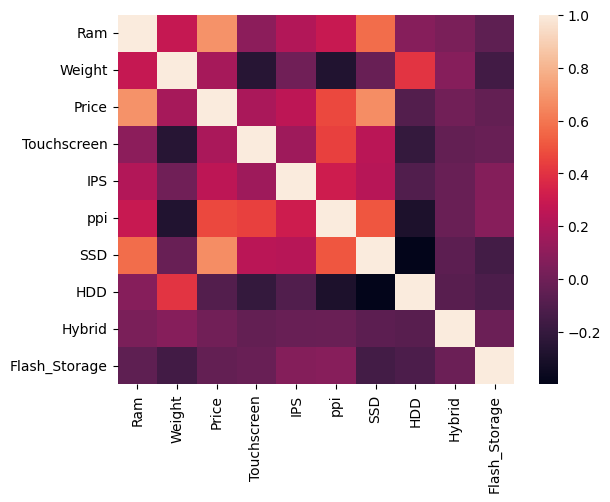

In [75]:
#graph
sns.heatmap(laptop[['Ram','Weight','Price','Touchscreen','IPS','ppi','SSD','HDD','Hybrid','Flash_Storage']].corr())

<Axes: xlabel='Price', ylabel='Density'>

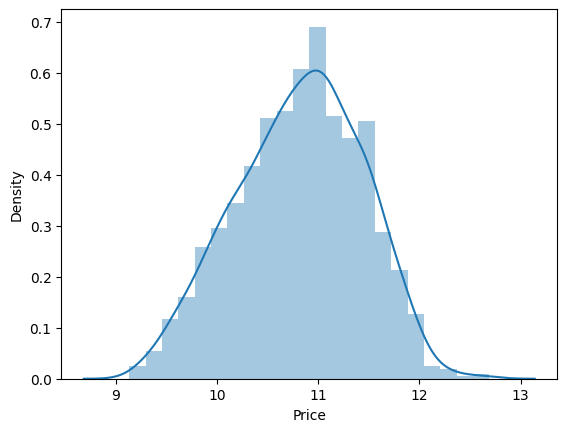

In [76]:
sns.distplot(np.log(laptop['Price']))

In [77]:
laptop.head(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,SSD,HDD,Hybrid,Flash_Storage,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0,Intel,Mac


In [78]:
#separating independent and dependent features

X=laptop.drop(columns=['Price'])
y=laptop['Price']

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [80]:
# calling catgorical features to Encode
categorical_features=["Company","TypeName","Cpu brand","Gpu brand","OS"]
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')

In [81]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
#Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
step1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
lr=LinearRegression()

pipe1=Pipeline([
    ('step1',step1),
    ('step2',lr)
])

pipe1.fit(X_train,y_train)    #training

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'Cpu brand', 'Gpu brand',
                                                   'OS'])])),
                ('step2', LinearRegression())])

In [83]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
step1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
rf=RandomForestRegressor(random_state=42)

pipe2=Pipeline([
    ('step1',step1),
    ('step2',rf)
])

pipe2.fit(X_train,y_train)   #training

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'Cpu brand', 'Gpu brand',
                                                   'OS'])])),
                ('step2', RandomForestRegressor(random_state=42))])

In [84]:
#  GradientBoostREgressor
from sklearn.ensemble import GradientBoostingRegressor
step1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
gbr=GradientBoostingRegressor(random_state=42)

pipe3=Pipeline([
    ('step1',step1),
    ('step2',gbr)
])

pipe3.fit(X_train,y_train)        #training

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'Cpu brand', 'Gpu brand',
                                                   'OS'])])),
                ('step2', GradientBoostingRegressor(random_state=42))])

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
pipe_rf=Pipeline(steps=[('preprocessor',ct),('GridSearch',grid_search_rf)])
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'Cpu brand', 'Gpu brand',
                                                   'OS'])])),
                ('GridSearch',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=42),
                              param_grid={'max_depth': [None, 10, 20, 30],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [50, 100, 200]},
                              scoring='neg_mean_squared_error'))])

In [87]:
# Gradient Boosting Hyperparameter Tuning
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
pipe_gbr=Pipeline(steps=[('preprocessor',ct),('GredientBoosting',grid_search_gbr)])
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Company', 'TypeName',
                                                   'Cpu brand', 'Gpu brand',
                                                   'OS'])])),
                ('GredientBoosting',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(random_state=42),
                              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                                          'max_depth': [3, 5, 7],
                                          'n_estimators': [50, 100, 200]},
                              scoring='neg_mean_squared_error'))])

In [88]:
# Best estimator
best_rf = grid_search_rf.best_estimator_
best_gbr = grid_search_gbr.best_estimator_

In [89]:
best_rf,best_gbr

(RandomForestRegressor(n_estimators=200, random_state=42),
 GradientBoostingRegressor(learning_rate=0.2, random_state=42))

In [90]:
# Best parameters
best_rf = grid_search_rf.best_params_
best_gbr = grid_search_gbr.best_params_

In [91]:
best_rf,best_gbr

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200},
 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100})

In [92]:
# Best Score
best_rf = grid_search_rf.best_score_
best_gbr = grid_search_gbr.best_score_

In [93]:
best_rf,best_gbr

(-272187416.57750046, -250771609.05466366)

In [94]:
#Testing Linear Regression
y_pred=pipe1.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("Linear Regression Evolution")
print("RMSE", RMSE)

Linear Regression Evolution
RMSE 19164.742683872613


In [96]:
#Testing RandomForest
y_pred=pipe_rf.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RandomForest Evolution")
print("RMSE", RMSE)

RandomForest Evolution
RMSE 16908.949109372967


In [98]:
#Testing GredientBoosting
y_pred=pipe_gbr.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("GredientBoosting Evolution")
print("RMSE", RMSE)

GredientBoosting Evolution
RMSE 17127.403538986713


In [100]:
from sklearn.metrics import r2_score
# Creating a set for all models
models = {
    'Linear Regression': pipe1,
    'Random Forest': pipe_rf,
    'Gradient Boosting': pipe_gbr
}

# Initialize the val_scores dictionary
val_scores = {}

# Evaluating the best fit model

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test,y_pred)
    val_scores[name] = val_r2_score
    print(f"{name} Validation r2_score: {val_r2_score}")

Linear Regression Validation r2_score: 0.6960835987488667
Random Forest Validation r2_score: 0.7634181699131085
Gradient Boosting Validation r2_score: 0.7572656642386271


In [112]:
# Finalize Best Model
best_model_name = max(val_scores, key=val_scores.get)
best_model = models[best_model_name]
print(f"Best Fit Model: {best_model_name}")

Best Fit Model: Random Forest


In [113]:
# GRADIO APPLICATION

In [114]:
# Unique columns of Independent features for creating gradio application

X.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi',
       'Cpu brand', 'SSD', 'HDD', 'Hybrid', 'Flash_Storage', 'Gpu brand',
       'OS'],
      dtype='object')

In [103]:
def prediction(Company, TypeName, Ram, Weight, Touchscreen, IPS, ppi,
               Cpu_brand, SSD, HDD, Hybrid, Flash_Storage, Gpu_brand, OS):
  inputs_df=pd.DataFrame([[Company, TypeName, Ram, Weight, Touchscreen, IPS, ppi,
               Cpu_brand, SSD, HDD, Hybrid, Flash_Storage, Gpu_brand, OS]],columns=["Company","TypeName","Ram","Weight","Touchscreen","IPS","ppi",
                                                                              "Cpu brand","SSD","HDD","Hybrid","Flash_Storage","Gpu brand","OS"])
  output=pipe_rf.predict(inputs_df)
  return output[0]

In [104]:
prediction("Dell","Notebook",8,1.98,1,0,160.454670,"AMD Processor",512,0,0,0,"Nvidia","Windows")

67817.86980000007

In [105]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [106]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
# create gradio application and add dropdown for categorical variables
import gradio as gr
Company_input=gr.Dropdown(label="Company",choices=['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'])
Type_name=gr.Dropdown(label="TypeName",choices=["Ultrabook","Notebook","Gaming","2 in 1 Convertible","Workstation","Netbook"])
Ram=gr.Number(label="Ram")
weight=gr.Number(label="Weight")
Touch=gr.Number(label="TouchScreen")
ips=gr.Number(label="IPS")
ppi=gr.Number(label="ppi")
Cpu=gr.Dropdown(label="Cpu brand",choices=["Intel Core i3","Intel Core i5","Intel Core i7","AMD Processor","other Intel Processor"])
SSD=gr.Number(label="SSD")
HDD=gr.Number(label="HDD")
Hybrid=gr.Number(label="Hybrid")
Flash_Storage=gr.Number(label="Flash_Storage")
Gpu=gr.Dropdown(label="Gpu brand",choices=["Intel","Nvidia","AMD","ARM"])
OS=gr.Dropdown(label="OS",choices=["Windows","Mac","others/No OS/Linux"])

In [108]:
demo=gr.Interface(fn=prediction,inputs=[Company_input,Type_name,Ram,weight,Touch,ips,ppi,Cpu,SSD,HDD,Hybrid,Flash_Storage,Gpu,OS],
                  outputs=gr.Number(label="Predicted Price"))

In [109]:
#launch gradio application
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
